# Particle in a Box QS1
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/laperk01/CHEM2011/master)

## Setting up
Start with pandas, matplotlib and numpy:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Import the data using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#csv-text-files):

In [2]:
dyeA = pd.read_csv('Data/DyeA.txt', 
                   delimiter='\t',   #tab delimited
                   skiprows=17,      #ignore metadata at top of file
                   names=['Dye A'],  #name the absorption data column 
                   index_col=0,      #make the wavelength the index column
                   skipfooter=1,     #ignore the last line of data
                   engine='python')  #for skipfooter

In [3]:
dyeB = pd.read_csv('Data/DyeB.txt', 
                   delimiter='\t', 
                   skiprows=17, 
                   names=['Dye B'], 
                   index_col=0,
                   skipfooter=1, 
                   engine='python')

In [4]:
dyeC = pd.read_csv('Data/DyeC.txt', 
                   delimiter='\t', 
                   skiprows=17, 
                   names=['Dye C'], 
                   index_col=0,
                   skipfooter=1, 
                   engine='python')

Combine the data files into one dataframe (table) using pandas [concat](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html):

In [5]:
all_dyes = pd.concat([dyeA, dyeB, dyeC], axis=1, join='outer')
all_dyes.head(10) #shows the first 10 rows of the dataframe, tail() would show the last rows of data

,Dye A,Dye B,Dye C
200.0,0.270,0.420,0.633
201.0,0.136,0.205,0.431
202.0,0.274,0.272,1.324
203.0,0.315,0.612,0.783
204.0,0.175,0.366,0.835
205.0,0.225,0.257,0.828
206.0,0.157,0.518,0.895
207.0,0.319,0.696,0.465
208.0,0.085,0.147,0.482
209.0,0.280,0.293,0.451


## Results
Let's plot the dyes on the same figure using [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) and Matplotlib:

<Figure size 432x288 with 0 Axes>

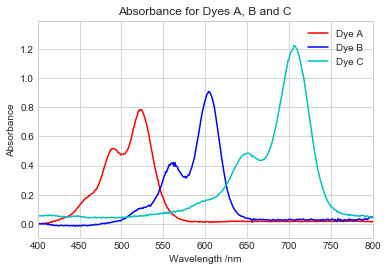

In [6]:
colours = ['r', 'b', 'c'] #use red, blue and cyan

plt.figure()
all_dyes.plot(xlim=[400,800], title='Absorbance for Dyes A, B and C', color=colours)
plt.xlabel('Wavelength /nm')
plt.ylabel('Absorbance')

plt.savefig('Dyes_absorption.png', dpi=150)  # Save the figure

## Analysis
First let's create a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) for each dye so we can use these values later:

In [7]:
dyeA = {}
dyeB = {}
dyeC = {}
dye_list = [dyeA, dyeB, dyeC]

Next determine the wavelengths of the maximum absorbance of the longest-wavelength peak $\lambda_{max}$ and maximum absorbance $A_{max}$. Pandas can quickly determine the [maximum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html?highlight=max#pandas.DataFrame.max) value and its wavelength.
Using Python [for loops](https://wiki.python.org/moin/ForLoop) this information can quickly be assigned to the dictionaries for each dye:

In [8]:
for i,dye in enumerate(all_dyes):                             #loop over each dye
    dye_list[i]['Max Wavelength'] = all_dyes[dye].idxmax()    #Index of maximum value i.e. wavelength 
    dye_list[i]['Max Absorbance'] = all_dyes[dye].max()       #Maximum value i.e. absorbance
    dye_list[i]['Concentration'] = 1                          #We'll change this later

dyeA, dyeB, dyeC

({'Max Wavelength': 523.0, 'Max Absorbance': 0.784, 'Concentration': 1},
 {'Max Wavelength': 604.0,
  'Max Absorbance': 0.9059999999999999,
  'Concentration': 1},
 {'Max Wavelength': 202.0, 'Max Absorbance': 1.324, 'Concentration': 1})

Who noticed that the wavelength max for Dye C isn't where we expected? The noise at the start of the data has a larger absorbance (not a sign of a good spectroscopist!) than the signal, so limit the range over which the maximum is searched to 400 nm upwards:

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#slicing-ranges

In [9]:
all_dyes['Dye C'][400:].idxmax(), all_dyes['Dye C'][400:].max() #slicing the data from 400 nm onwards i.e. [400:]

(706.0, 1.222)

That's more like it! Now let's add that and the actual dye concentrations to the dictionary:

In [10]:
dyeC['Max Wavelength'] = all_dyes['Dye C'][400:].idxmax()
dyeC['Max Absorbance'] = all_dyes['Dye C'][400:].max()

dyeA['Concentration'] = 1e-5
dyeB['Concentration'] = 0.75e-5
dyeC['Concentration'] = 0.5e-5

dyeA, dyeB, dyeC

({'Max Wavelength': 523.0, 'Max Absorbance': 0.784, 'Concentration': 1e-05},
 {'Max Wavelength': 604.0,
  'Max Absorbance': 0.9059999999999999,
  'Concentration': 7.5e-06},
 {'Max Wavelength': 706.0, 'Max Absorbance': 1.222, 'Concentration': 5e-06})

## Calculations

### Applying the particle-in-a-box model to estimate $L$
Beer's law relates the absorbance $A$ to $c$ the concentration (mol L$^{–1}$) of the absorbing species, $l$ the pathlength of the cuvette in cm and ε the molar absorption coefficient (the conventional units of ε are L mol$^{–1}$ cm$^{–1}$): 

$$A = ε c l$$

For each dye use Beer's law to calculate the molar absorption coefficient at $\lambda_{max}$:

In [11]:
l = 1 #pathlength

for dye in dye_list:
    A = dye['Max Absorbance']
    c = dye['Concentration']
    molar_abs_coef = A/(c*l)
    dye['Molar absorption coefficient'] = molar_abs_coef
    
    print('ε:', molar_abs_coef)

ε: 78400.0
ε: 120799.99999999999
ε: 244399.99999999997


Calculate the frequency of light absorbed at $\lambda_{max}$ from $c = \nu \lambda$, then calculate $\Delta E$ from $\nu$ using the Planck equation $\Delta E = h \nu$.

[Scipy](https://docs.scipy.org/doc/scipy/reference/constants.html) has scientific constants ready to use so let's import them!

In [12]:
from scipy import constants

#dyeA['Frequency'] = constants.c/dyeA['Max Wavelength']
#dyeA['dEnergy'] = constants.h*dyeA['Frequency']
#dyeA['Frequency'], dyeA['dEnergy']

for dye in dye_list:
    dye['Frequency'] = constants.c/(dye['Max Wavelength']*1e-9)
    dye['dEnergy'] = constants.h*dye['Frequency']
    
    print('Frequency: ', dye['Frequency'], '\nEnergy change: ', dye['dEnergy'])
    print("---")

Frequency:  573216936902485.6 
Energy change:  3.7981756350839933e-19
---
Frequency:  496345129139072.8 
Energy change:  3.2888176442863053e-19
---
Frequency:  424635209631728.06 
Energy change:  2.8136626871797857e-19
---


Write down the number of carbon atoms in the N-C-...-C-N chain ($p$), and the number of $\pi$ electrons ($N = p + 3$):

In [13]:
# Carbon atoms:
dyeA['p'] = 3
dyeB['p'] = 5
dyeC['p'] = 7

In [14]:
# pi electrons:
dyeA['N'] = 6
dyeB['N'] = 8
dyeC['N'] = 10

In [15]:
C = constants.h**2/(8*constants.m_e)

Use equation 2 with $∆E$ and $N$ to calculate $C$:
$$
\Delta E = C(n_2^2 − n_1^2) \\
C\left (\left (\frac{N}{2}+1 \right )^2 - \left (\frac{N}{2}\right )^2\right ) \\
= C(N+1)
$$

From *C* calculate the length over which the $\pi$ electrons are delocalised according to the particle-in-a-box model used here.

In [16]:
for dye in dye_list:
    dye['L'] = np.sqrt(C*(dye['N']+1)/dye['dEnergy']) # Do you understand this?
    
    print(dye['L']*1e9, ' nm')

1.053726825594447  nm
1.2840084918664523  nm
1.5347119157032734  nm


In [17]:
dyeA['Lgeom'] = 0.7e-9
dyeB['Lgeom'] = 0.98e-9
dyeC['Lgeom'] = 1.26e-9

In [19]:
for dye in dye_list:
#    print(dye)
    dye['dE_geom'] = C/dye['Lgeom']**2*(dye['N']+1)
    print("dE from geom")
    print(dye['dE_geom'])

    dye['wavelength'] = constants.h*constants.c/dye['dE_geom']
    print("Wavelength")
    print(dye['wavelength'])

dE from geom
8.606667717482244e-19
Wavelength
2.3080313105546902e-07
dE from geom
5.645773284062696e-19
Wavelength
3.5184655089789277e-07
dE from geom
4.1743097395196065e-19
Wavelength
4.758740920307307e-07


Tabulate all the data:

In [21]:
final_table = pd.DataFrame.from_dict([dyeA, dyeB, dyeC])
final_table.index = ['Dye A', 'Dye B', 'Dye C']
final_table.style.format("{:.3g}")

,Max Wavelength,Max Absorbance,Concentration,Molar absorption coefficient,Frequency,dEnergy,p,N,L,Lgeom,dE_geom,wavelength
Dye A,523,0.784,1e-05,7.84e+04,5.73e+14,3.8e-19,3,6,1.05e-09,7e-10,8.61e-19,2.31e-07
Dye B,604,0.906,7.5e-06,1.21e+05,4.96e+14,3.29e-19,5,8,1.28e-09,9.8e-10,5.65e-19,3.52e-07
Dye C,706,1.22,5e-06,2.44e+05,4.25e+14,2.81e-19,7,10,1.53e-09,1.26e-09,4.17e-19,4.76e-07


### Lambda vs lambda plot:

In [28]:
#x = final_table['p']
y = final_table['wavelength']*1e9
#z = final_table['Max Wavelength']

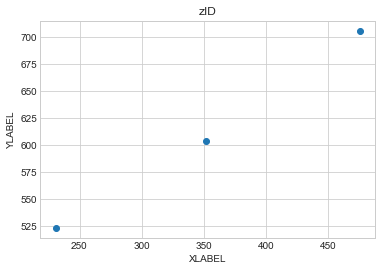

In [31]:
fig = plt.figure()
plt.plot(y, final_table['Max Wavelength'], 'o')

plt.xlabel('XLABEL')
plt.ylabel('YLABEL')
plt.title('zID')
plt.show()

fig.savefig('zID_2.png', dpi=150)  # Save the figure